# DataSet Information

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke or not based on the input parameters.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Load Dataset

In [2]:
df = pd.read_csv("BStroke.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Here in dataset 0 represent No and 1 represent Yes

# Data Visualizations

In [3]:
df.shape

(5110, 12)

Here in this dataset 5110 instances and 12 attributes

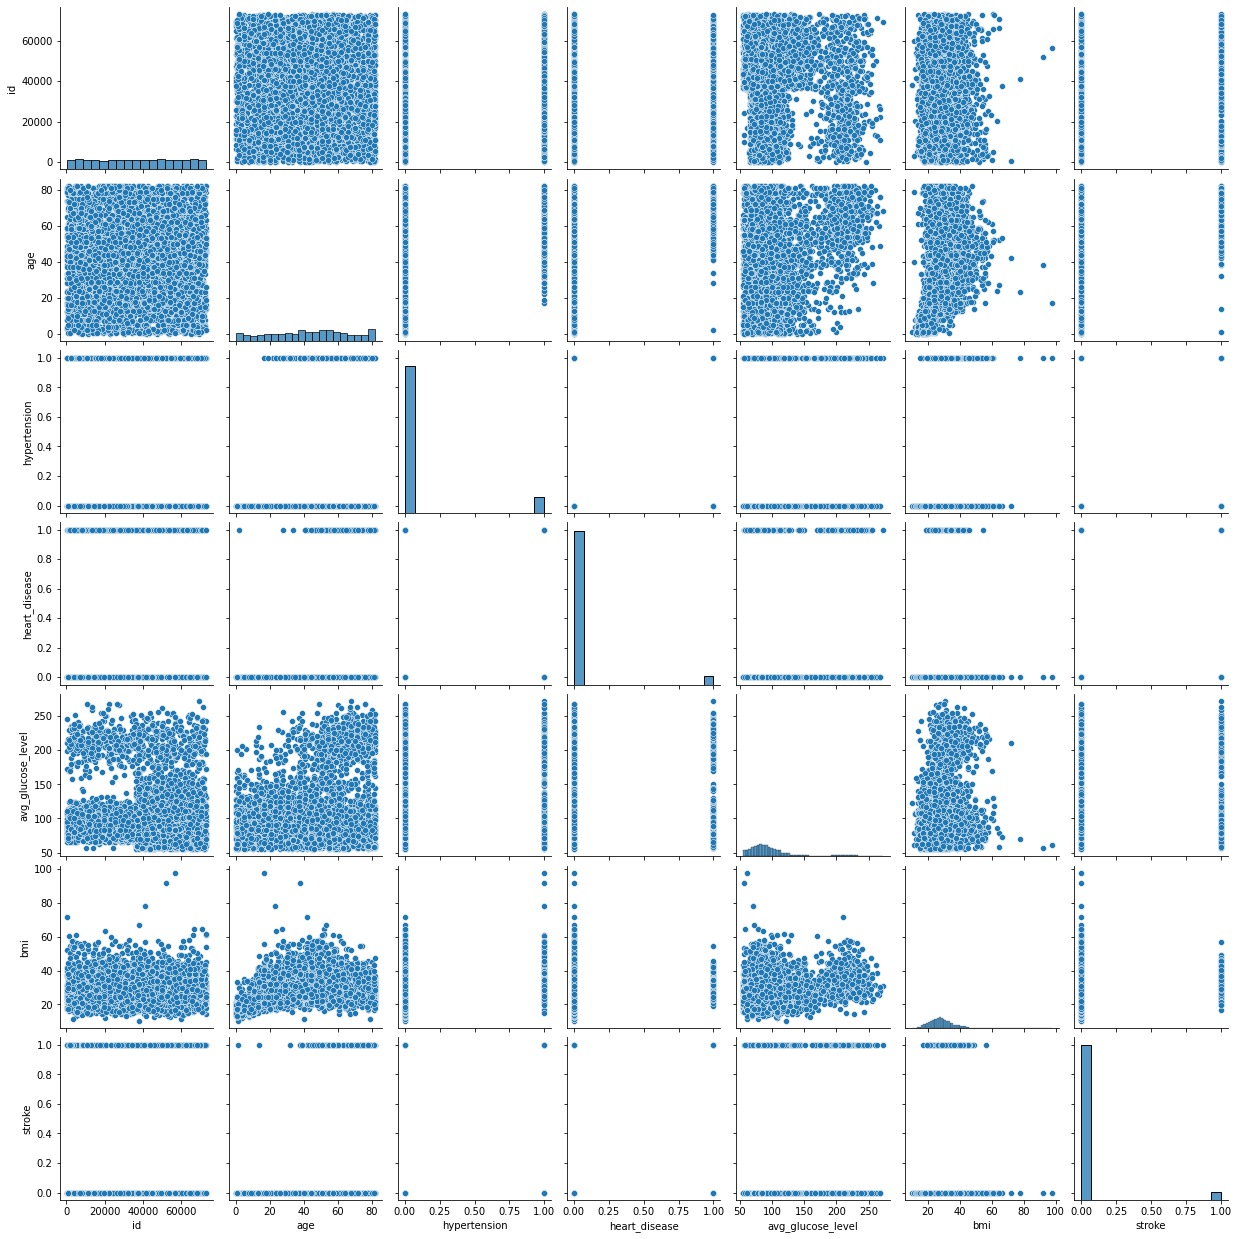

In [4]:
sns.pairplot(df)

<AxesSubplot:xlabel='stroke', ylabel='count'>

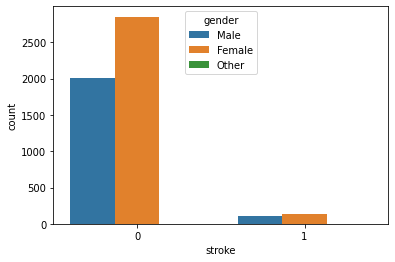

In [5]:
sns.countplot(x="stroke", hue="gender", data=df)

In [6]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:>

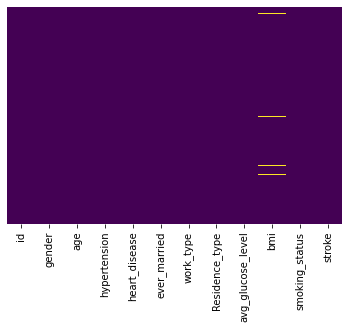

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

# Exploratory data analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Handling Missing Value

In [10]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df["bmi"].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [12]:
# get the mean
bmean = df["bmi"].mean()

# fill the value
df["bmi"].fillna(bmean, inplace=True)

In [13]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Now no missing value is present in dataset.

In [14]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Feature Engineering

<AxesSubplot:>

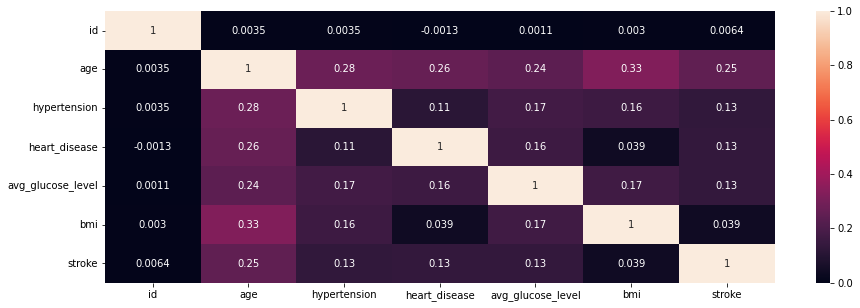

In [15]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)

In [16]:
df.drop('id',axis=1,inplace=True)

In [17]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Outlier Removal

<AxesSubplot:>

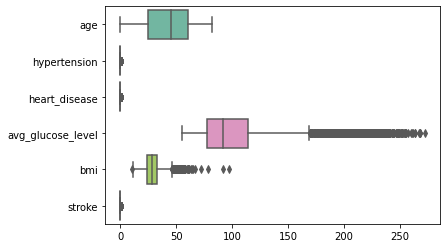

In [18]:
sns.boxplot(data=df,orient="h",palette="Set2")

In [19]:
df["avg_glucose_level"].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [20]:
df[df["avg_glucose_level"]>114]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


In [21]:
df["bmi"].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [22]:
df[df["bmi"]>32]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
16,Male,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
5087,Female,63.0,0,0,Yes,Self-employed,Rural,75.93,34.7,formerly smoked,0
5092,Male,76.0,0,0,Yes,Govt_job,Urban,82.35,38.9,never smoked,0
5097,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5103,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0


Here in the  "avg_glucose_level" and "bmi" columns having large number of outliers and this is highly correlated with stroke colomn that is the reason why people getting brain stroke. so we can not remove outliers.

# Label Encoding

In [23]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [24]:
df_cat = df.select_dtypes("object")
df_num = df.select_dtypes(["int64","float64"])

In [25]:
df_cat

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [26]:
df_num

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0
5106,81.0,0,0,125.20,40.000000,0
5107,35.0,0,0,82.99,30.600000,0
5108,51.0,0,0,166.29,25.600000,0


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [29]:
df_cat

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2
...,...,...,...,...,...
5105,0,1,2,1,2
5106,0,1,3,1,2
5107,0,1,3,0,2
5108,1,1,2,0,1


# Skewness

In [30]:
df_num

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0
5106,81.0,0,0,125.20,40.000000,0
5107,35.0,0,0,82.99,30.600000,0
5108,51.0,0,0,166.29,25.600000,0


In [31]:
from scipy.stats import skew

age
-0.1370190866396024


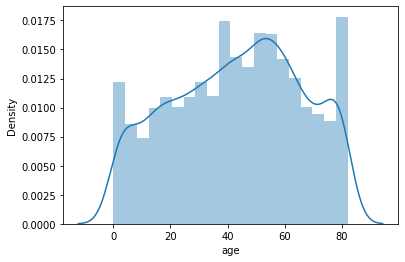

hypertension
2.714594511421973


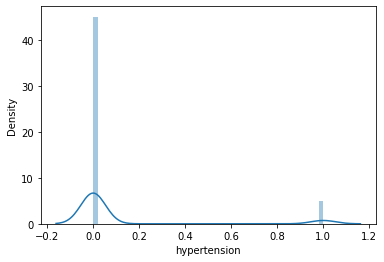

heart_disease
3.9460851899886302


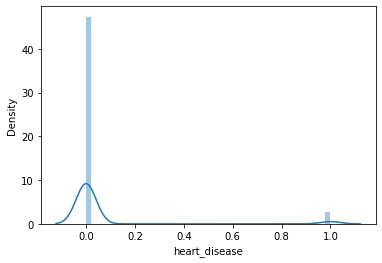

avg_glucose_level
1.571822297397199


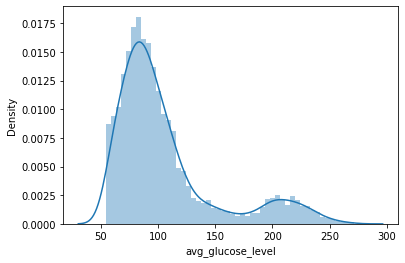

bmi
1.0763999841401004


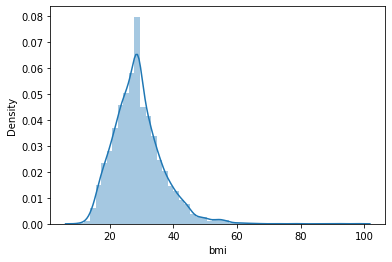

stroke
4.192053480263753


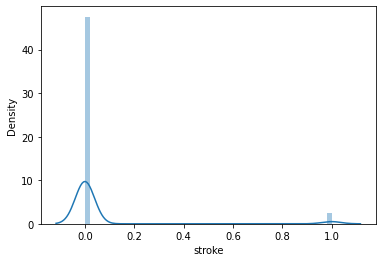

In [32]:
for col in df_num:
    print(col)
    print(skew(df_num[col]))
    
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

<AxesSubplot:>

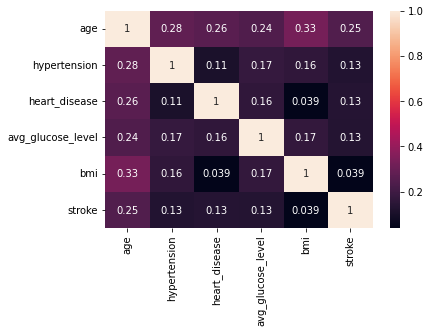

In [33]:
sns.heatmap(df_num.corr(), annot=True)

From the graphs some columns are negtive skewed and some columns are the high corilated columns, so we can not reduce skewness except avg_glucose_level.

In [34]:
df_num["avg_glucose_level"] = np.sqrt(np.sqrt(df_num["avg_glucose_level"]))
skew(df_num["avg_glucose_level"])

1.065591820527654

In [35]:
df = pd.concat([df_cat,df_num], axis=1)

In [36]:
df.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,67.0,0,1,3.888766,36.600000,1
1,0,1,3,0,2,61.0,0,0,3.770949,28.893237,1
2,1,1,2,0,2,80.0,0,1,3.208075,32.500000,1
3,0,1,2,1,3,49.0,0,0,3.617387,34.400000,1
4,0,1,3,0,2,79.0,1,0,3.632555,24.000000,1


# feature Scalling

In [37]:
from sklearn.preprocessing import StandardScaler

for col in df:
    sc =StandardScaler()
    df[col] = sc.fit_transform(df[[col]])

In [38]:
df.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1.188073,0.723884,-0.153836,0.984080,-0.351781,1.051434,-0.328602,4.185032,2.424427,1.001234e+00,4.418381
1,-0.840344,0.723884,0.763438,-1.016178,0.581552,0.786070,-0.328602,-0.238947,2.029484,4.615554e-16,4.418381
2,1.188073,0.723884,-0.153836,-1.016178,0.581552,1.626390,-0.328602,4.185032,0.142628,4.685773e-01,4.418381
3,-0.840344,0.723884,-0.153836,0.984080,1.514885,0.255342,-0.328602,-0.238947,1.514716,7.154182e-01,4.418381
4,-0.840344,0.723884,0.763438,-1.016178,0.581552,1.582163,3.043196,-0.238947,1.565561,-6.357112e-01,4.418381


# Saperating X & Y

In [39]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [40]:
x

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1.188073,0.723884,-0.153836,0.984080,-0.351781,1.051434,-0.328602,4.185032,2.424427,1.001234e+00
1,-0.840344,0.723884,0.763438,-1.016178,0.581552,0.786070,-0.328602,-0.238947,2.029484,4.615554e-16
2,1.188073,0.723884,-0.153836,-1.016178,0.581552,1.626390,-0.328602,4.185032,0.142628,4.685773e-01
3,-0.840344,0.723884,-0.153836,0.984080,1.514885,0.255342,-0.328602,-0.238947,1.514716,7.154182e-01
4,-0.840344,0.723884,0.763438,-1.016178,0.581552,1.582163,3.043196,-0.238947,1.565561,-6.357112e-01
...,...,...,...,...,...,...,...,...,...,...
5105,-0.840344,0.723884,-0.153836,0.984080,0.581552,1.626390,3.043196,-0.238947,-0.470585,4.615554e-16
5106,-0.840344,0.723884,0.763438,0.984080,0.581552,1.670617,-0.328602,-0.238947,0.601754,1.442949e+00
5107,-0.840344,0.723884,0.763438,-1.016178,0.581552,-0.363842,-0.328602,-0.238947,-0.493670,2.217363e-01
5108,1.188073,0.723884,-0.153836,-1.016178,-0.351781,0.343796,-0.328602,-0.238947,1.426293,-4.278451e-01


In [41]:
le = LabelEncoder()
y = le.fit_transform(y)

In [42]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

 # Train Test Split

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [44]:
x.shape, xtrain.shape, xtest.shape

((5110, 10), (3577, 10), (1533, 10))

# Model Training

In [45]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
  
    ac = accuracy_score(ytest, ypred)
    cm = confusion_matrix(ytest, ypred)
    cr = classification_report(ytest, ypred)
    


    print(f"Accuracy : {ac}\n\nConfusion Matrix : \n{cm}\n\nClassification Report : \n{cr}")

In [46]:
logreg = LogisticRegression()
mymodel(logreg)

Accuracy : 0.9458577951728636

Confusion Matrix : 
[[1450    0]
 [  83    0]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



In [47]:
knn = KNeighborsClassifier()
mymodel(knn)

Accuracy : 0.9432485322896281

Confusion Matrix : 
[[1446    4]
 [  83    0]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.92      1533



In [48]:
svm = SVC()
mymodel(svm)

Accuracy : 0.9458577951728636

Confusion Matrix : 
[[1450    0]
 [  83    0]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



# HYPERPARAMETER TUNING

In [49]:
# solver = [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
# penality = [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
# C = [100, 10, 1.0, 0.1, 0.01]

In [50]:
logreg1 = LogisticRegression(solver="newton-cg")
mymodel(logreg1)

Accuracy : 0.9458577951728636

Confusion Matrix : 
[[1450    0]
 [  83    0]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



In [51]:
logreg2 = LogisticRegression(solver="lbfgs")
mymodel(logreg2)

Accuracy : 0.9458577951728636

Confusion Matrix : 
[[1450    0]
 [  83    0]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



In [52]:
logreg3 = LogisticRegression(solver="liblinear")
mymodel(logreg3)

Accuracy : 0.9458577951728636

Confusion Matrix : 
[[1450    0]
 [  83    0]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



In [53]:
logreg4 = LogisticRegression(solver="liblinear")
mymodel(logreg4)

Accuracy : 0.9458577951728636

Confusion Matrix : 
[[1450    0]
 [  83    0]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



In [54]:
logreg5 = LogisticRegression(solver="saga")
mymodel(logreg5)

Accuracy : 0.9458577951728636

Confusion Matrix : 
[[1450    0]
 [  83    0]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



# Final Result

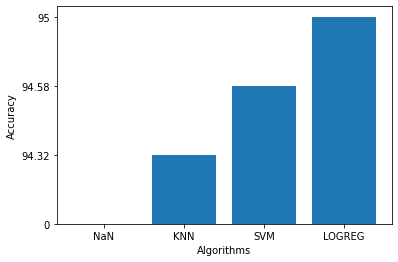

In [55]:
plt.bar(["NaN","KNN","SVM","LOGREG"],["0","94.32","94.58","95"])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

After see the above models accuracy we can say that Logistic Regression is best fit Model.